# Digit recognition

 Developers and scientists are diving into machine learning and deep learning techniques,to make machines more intelligent.Take a practical example,a human being learns how to ride a bicycle by repearting it over and over again, so that she memorizes how to ride a bicycle. The neurons in her brain automatically trigger and they can quickly and automatically how to ride a bicycle if she ois given one. This defines **deep learning** . Deep learning  uses different neural network architectures for different types of problems such as image segmentation,object recognition,object detection and image and sound classification.
 
In this project, we are going to implement a digit recognition using the MNIST dataset.We will be using a type of deep neural netork known as *Convolutional Neural Networks* amd know how to create a Keras-based neural network in TensorFlow that processes the MNIST dataset
The MNIST dataset contains 60,000 tarining images of handwritten digits from 0 to 9 and 10,000  testing images.

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_12 (Flatten)         (None, 576)               0         
_________________________________________________________________
dense_24 (Dense)             (None, 64)              

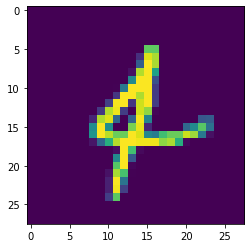

Result: [[3.3952665e-06 5.0980027e-04 9.0646237e-05 6.4166002e-06 9.9907148e-01
  2.2110012e-06 9.0065631e-05 1.6856332e-04 2.9679368e-05 2.7772752e-05]]
Result.argmax(): 4


In [37]:
# 
#import libraries 
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import keras

# a.)
#load the MNIST dataset and split between train and test sets representes as a 28*28 matrix
(train_images,train_labels),(test_images,test_labels)=tf.keras.datasets.mnist.load_data()


#The MNIST dataset has 60,000 training images and 10,000 testing images
train_images=train_images.reshape((60000,28,28,1))
test_images=test_images.reshape((10000,28,28,1))

# b.)
#Normalize pixel values from range of 0-255 to 0-1
train_images,test_images=train_images/255.0 ,test_images/255.0

model=tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(32, (3,3),activation='relu',input_shape=(28,28,1)))
model.add(tf.keras.layers.MaxPooling2D((2,2)))
model.add(tf.keras.layers.Conv2D(64, (3,3),activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2,2)))
model.add(tf.keras.layers.Conv2D(64,(3,3),activation='relu'))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

# C.)
model.summary()
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics='accuracy')
model.fit(train_images,train_labels,epochs=1,batch_size=10)



#predict label of one image
test_image=np.expand_dims(test_images[300],axis=0)
plt.imshow(test_image.reshape(28,28))
plt.show()

result=model.predict(test_image)
print("Result:",result)
print("Result.argmax():",result.argmax())


## Documentation.
To clearly understand what is taking place we will have a step by step procedure of the codes
 * a.) **Preprocessing the data** :
  *After initializing the training data and labels, as well as the test data and labels, via the **load_data()** function,the images are reshaped so that they are 28x28 images . The dimension of the training data is therefore(60000,28,28).The CNN model will need one more dimension so we reshape the matrix to shape (60000,28,28,1)*
  
 * b.) **Creating the model**:
   *Then the pixel values are rescaled from the range 0-255 (all integers) to the range 0-1 (decimal values) .The next portion uses the Keras Sequential() API to define a Keras-based model called **model**, which contains two pairs of Conv2D and MaxPooling2D layers, followed by the Flatten layer, and then two consecutive Dense layers
 Generally,CNN models consist of convolutional and pooling layers. The dropout layer is used to deactivate some neurons and while training it reduces overfitting of the model*.
 
 * c.) **Train the model**:
  *The model is compiled, trained, and evaluated via the compile(),fit(), and evaluate() methods, The model.fit() function in Keras, will start training the model.It takes into account the training data,epochs and batch size.*
 
 * d.) **Prediction**:
  *The final part successfully predicts the image whose label is 4, which is then displayed via *matplotlib**